In [1]:
import json
import pandas as pd

In [2]:
## Loading json file data and converting it into dataframe
df=pd.read_json('user_wallet.json')

In [3]:
df.head()

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


In [4]:
df.columns

Index(['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId',
       'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt',
       'updatedAt'],
      dtype='object')

In [5]:
action_data=pd.json_normalize(df['actionData'])
df_flat = pd.concat([df.drop(columns=["actionData"]),action_data], axis=1)
df_flat.columns

Index(['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId',
       'timestamp', 'blockNumber', 'action', '__v', 'createdAt', 'updatedAt',
       'type', 'amount', 'assetSymbol', 'assetPriceUSD', 'poolId', 'userId',
       'toId', 'borrowRateMode', 'borrowRate', 'variableTokenDebt',
       'stableTokenDebt', 'callerId', 'useATokens', 'repayerId',
       'liquidatorId', 'collateralAmount', 'collateralAssetPriceUSD',
       'principalAmount', 'borrowAssetPriceUSD', 'collateralReserveId',
       'collateralReserveSymbol', 'principalReserveId',
       'principalReserveSymbol'],
      dtype='object')

## Feature Selection

In [6]:
cols = [
    "userWallet",
    "action",
    "amount",
    "assetSymbol",
    "assetPriceUSD"
]
df_copy=df_flat[cols].copy()
df_copy.head()

,userWallet,action,amount,assetSymbol,assetPriceUSD
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,deposit,2000000000,USDC,0.9938318274296357543568636362026045
1,0x000000000051d07a4fb3bd10121a343d85818da6,deposit,145000000000000000000,WMATIC,1.970306761113742502077627085754506
2,0x000000000096026fb41fc39f9875d164bd82e2dc,deposit,1000000000000000,WMATIC,0.9223772540040778087468127454060907
3,0x000000000096026fb41fc39f9875d164bd82e2dc,deposit,4000000000000000,WMATIC,1.057483342538527030870377652200841
4,0x0000000000e189dd664b9ab08a33c4839953852c,redeemunderlying,501548,USDC,1.00212969929885247748335868168494


In [7]:
## Checking for null values
df_copy.isnull().sum()

userWallet       0
action           0
amount           0
assetSymbol      0
assetPriceUSD    0
dtype: int64

In [8]:
## Checking data type
df_copy.dtypes

userWallet       object
action           object
amount           object
assetSymbol      object
assetPriceUSD    object
dtype: object

In [9]:
df_copy

,userWallet,action,amount,assetSymbol,assetPriceUSD
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,deposit,2000000000,USDC,0.9938318274296357543568636362026045
1,0x000000000051d07a4fb3bd10121a343d85818da6,deposit,145000000000000000000,WMATIC,1.970306761113742502077627085754506
2,0x000000000096026fb41fc39f9875d164bd82e2dc,deposit,1000000000000000,WMATIC,0.9223772540040778087468127454060907
3,0x000000000096026fb41fc39f9875d164bd82e2dc,deposit,4000000000000000,WMATIC,1.057483342538527030870377652200841
4,0x0000000000e189dd664b9ab08a33c4839953852c,redeemunderlying,501548,USDC,1.00212969929885247748335868168494
...,...,...,...,...,...
99995,0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,repay,19724448273,USDT,1.002190552454766597115369809173134
99996,0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,redeemunderlying,2000000000000000000,WETH,2342.039086000003558177674738167022
99997,0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,deposit,1994013911857945550,WETH,2342.039086000003558177674738167022
99998,0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,borrow,4000000000,USDC,1.00190090059994152215282747624047


In [10]:
df_copy['assetSymbol'].unique()

array(['USDC', 'WMATIC', 'DAI', 'WBTC', 'WETH', 'USDT', 'WPOL', 'AAVE',
       ''], dtype=object)

In [11]:
## Cleaning and convertion to float
df_copy['assetPriceUSD'] = pd.to_numeric(df_copy['assetPriceUSD'],errors='coerce').fillna(1.0)
df_copy['amount']=pd.to_numeric(df_copy['amount'],errors = 'coerce').fillna(1.0)

In [12]:
token_decimals = {
    'USDC': 6,
    'USDT': 6,
    'DAI': 18,
    'WMATIC': 18,
    'WETH': 18,
    'WBTC': 8,
    'WPOL': 18,     
    'AAVE': 18,
    '': 18         
}

# Apply decimals scaling
df_copy["decimals"] = df_copy["assetSymbol"].map(token_decimals).fillna(18)
df_copy["amount_scaled"] = df_copy["amount"] / (10 ** df_copy["decimals"])

# Compute correct USD value
df_copy["usd_value"] = df_copy["amount_scaled"] * df_copy["assetPriceUSD"]

# Final amount to use for feature engineering
df_copy["amount_usd"] = df_copy["usd_value"]

# Optional: View a few rows
df_copy[["userWallet", "assetSymbol", "amount", "decimals", "amount_scaled", "assetPriceUSD", "usd_value"]].head(10)

,userWallet,assetSymbol,amount,decimals,amount_scaled,assetPriceUSD,usd_value
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,USDC,2.000000e+09,6,2000.000000,0.993832,1987.663655
1,0x000000000051d07a4fb3bd10121a343d85818da6,WMATIC,1.450000e+20,18,145.000000,1.970307,285.694480
2,0x000000000096026fb41fc39f9875d164bd82e2dc,WMATIC,1.000000e+15,18,0.001000,0.922377,0.000922
3,0x000000000096026fb41fc39f9875d164bd82e2dc,WMATIC,4.000000e+15,18,0.004000,1.057483,0.004230
4,0x0000000000e189dd664b9ab08a33c4839953852c,USDC,5.015480e+05,6,0.501548,1.002130,0.502616
5,0x0000000000e189dd664b9ab08a33c4839953852c,USDC,1.061639e+06,6,1.061639,1.002130,1.063900
6,0x0000000000e189dd664b9ab08a33c4839953852c,USDC,5.005530e+05,6,0.500553,1.000996,0.501051
7,0x0000000000e189dd664b9ab08a33c4839953852c,DAI,4.489247e+18,18,4.489247,1.000147,4.489905
8,0x0000000000e189dd664b9ab08a33c4839953852c,USDC,9.995000e+03,6,0.009995,1.001805,0.010013
9,0x0000000000e189dd664b9ab08a33c4839953852c,USDC,6.897212e+06,6,6.897212,1.003744,6.923036


## Feature Engineering

In [17]:
## Aggregating all USD transactions 
agg = df_copy.groupby(["userWallet", "action"])["usd_value"].sum().reset_index()
print(agg)

                                      userWallet            action  \
0     0x00000000001accfa9cef68cf5371a23025b6d4b6           deposit   
1     0x000000000051d07a4fb3bd10121a343d85818da6           deposit   
2     0x000000000096026fb41fc39f9875d164bd82e2dc           deposit   
3     0x0000000000e189dd664b9ab08a33c4839953852c  redeemunderlying   
4     0x0000000002032370b971dabd36d72f3e5a7bf1ee            borrow   
...                                          ...               ...   
7905  0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2             repay   
7906  0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a            borrow   
7907  0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a           deposit   
7908  0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a  redeemunderlying   
7909  0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a             repay   

         usd_value  
0     1.987664e+03  
1     2.856945e+02  
2     5.152311e-03  
3     1.960723e+03  
4     1.303558e+05  
...            ...  
7905  1.9989

In [46]:
# Create new DataFrame with 'amount_usd' and 'action'
df_txn = df_copy[["userWallet", "amount_usd", "action"]].copy()

# Pivot-style group aggregation
wallet_stats = pd.DataFrame(index=df_txn["userWallet"].unique())

wallet_stats["total_deposit_usd"] = df_txn[df_txn["action"] == "deposit"].groupby("userWallet")["amount_usd"].sum()
wallet_stats["total_borrow_usd"] = df_txn[df_txn["action"] == "borrow"].groupby("userWallet")["amount_usd"].sum()
wallet_stats["total_repay_usd"] = df_txn[df_txn["action"] == "repay"].groupby("userWallet")["amount_usd"].sum()
wallet_stats["num_liquidations"] = df_txn[df_txn["action"] == "liquidationcall"].groupby("userWallet")["action"].count()
wallet_stats["total_transactions"] = df_txn.groupby("userWallet")["action"].count()

# Fill missing (NaNs for users without borrow/repay etc.)
wallet_stats = wallet_stats.fillna(0)

In [47]:
wallet_stats["repay_ratio"] = wallet_stats["total_repay_usd"] / (wallet_stats["total_borrow_usd"] + 1e-6)
wallet_stats["liquidation_rate"] = wallet_stats["num_liquidations"] / (wallet_stats["total_transactions"] + 1e-6)
wallet_stats["deposit_borrow_ratio"] = wallet_stats["total_deposit_usd"] / (wallet_stats["total_borrow_usd"] + 1e-6)
wallet_stats["borrow_to_txn_ratio"] = wallet_stats["total_borrow_usd"] / (wallet_stats["total_transactions"] + 1e-6)

# Fill any missing values
wallet_stats = wallet_stats.fillna(0)

In [64]:
wallet_stats.to_csv("scored_wallets_custom.csv", index=False)

In [65]:
def compute_credit_score(row):
    score = 500  # Start from neutral

    # Repay ratio: 0 (no repay) to 1 (fully repaid) or more
    score += min(300, row["repay_ratio"] * 200)

    # Liquidation hurts! (0 to 1)
    score -= min(200, row["liquidation_rate"] * 1000)

    # Deposit vs Borrow — healthy if > 1
    score += min(100, row["deposit_borrow_ratio"] * 50)

    # Risky if always borrowing
    score -= min(100, row["borrow_to_txn_ratio"] * 50)

    # Clamp score between 0 and 1000
    return max(0, min(1000, score))


In [66]:
wallet_stats["credit_score"] = wallet_stats.apply(compute_credit_score, axis=1)

In [67]:
wallet_stats["credit_score"] = wallet_stats.apply(compute_credit_score, axis=1)

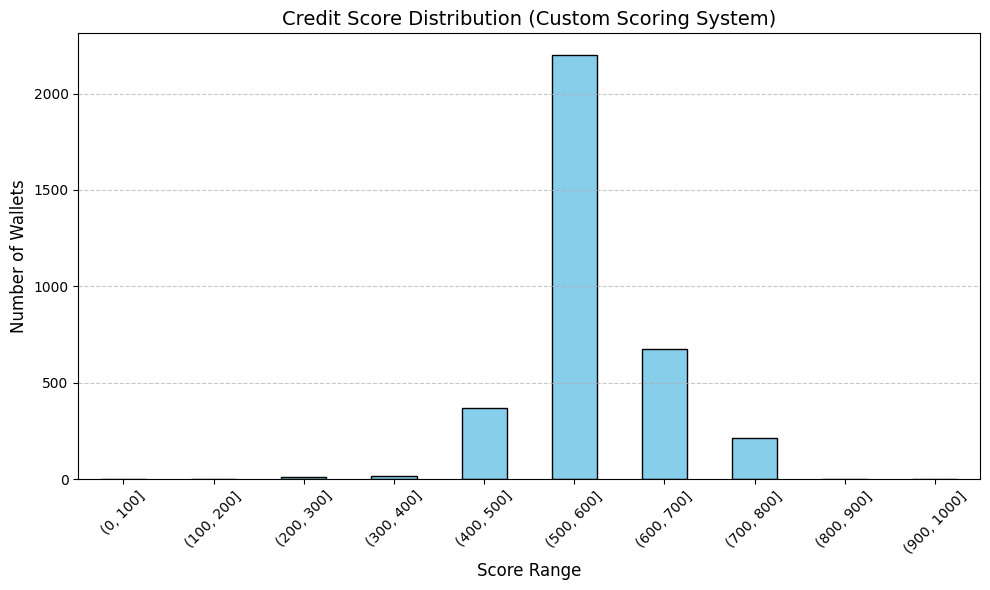

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Bin the scores into ranges of 100
wallet_stats["score_bin"] = pd.cut(wallet_stats["credit_score"], bins=range(0, 1100, 100))

# Step 2: Count how many wallets fall into each bin
score_distribution = wallet_stats["score_bin"].value_counts().sort_index()

# Step 3: Plot
plt.figure(figsize=(10, 6))
score_distribution.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Credit Score Distribution (Custom Scoring System)", fontsize=14)
plt.xlabel("Score Range", fontsize=12)
plt.ylabel("Number of Wallets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("distribution.png")
plt.show()
